# **Analiza statystyczna zbioru danych dot. ślimaków zwanych słuchotkami (lub uchowcami)**

# Autorzy: Oskar Kurczewski, Dominik Łapiński

**Importowanie pakietu pandas, numpy i matplotlib oraz wyświetlenie ich wersji**

In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

print(f'\nWersja pakietu pandas: {pd.__version__}')
print(f'Wersja pakietu numpy: {np.__version__}')
print(f'Wersja pakietu matplotlib: {matplotlib.__version__}')



Wersja pakietu pandas: 1.3.4
Wersja pakietu numpy: 1.21.4
Wersja pakietu matplotlib: 3.5.0


**Importowanie danych z pliku csv oraz nadanie nazw kolumnom**

In [2]:
col_names = ['Sex', 'Length', 'Diameter',
            'Height', 'Whole weight', 'Shucked weight',
            'Viscera weight', 'Shell weight', 'Rings']

data = pd.read_csv('data.csv', names=col_names)

*Wymagania na ocenę dostateczną:*

1. Tabela dla cechy jakościowej

In [3]:
counts = data['Sex'].value_counts()
percentage = [(count / data['Sex'].count())*100 for count in counts]

percentage = pd.Series(percentage, index=['M', 'I', 'F']).round(2)

output_qualitative = pd.concat([counts, percentage], axis=1)
output_qualitative.columns = ['count', 'percentage']

display(output_qualitative)

,count,percentage
M,1528,36.58
I,1342,32.13
F,1307,31.29


2. Tabela dla cech ilościowych

In [4]:
length = data['Length']

mean_values = data.loc[:, data.columns != 'Sex'].mean()
std_values = data.loc[:, data.columns != 'Sex'].std()
min_values = data.loc[:, data.columns != 'Sex'].min()
first_quartile = data.loc[:, data.columns != 'Sex'].quantile(0.25)
median = data.loc[:, data.columns != 'Sex'].quantile(0.5)
third_quartile = data.loc[:, data.columns != 'Sex'].quantile(0.75)
max_values = data.loc[:, data.columns != 'Sex'].max()


output_quantitative = pd.concat(
    [mean_values, std_values, min_values, first_quartile,
    median, third_quartile, max_values], axis=1)

output_quantitative.columns = ['mean', 'std', 'min', '25%',
                               '50%', '75%', 'max']

display(output_quantitative)

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Wykres słupkowy liczebności poszczególnych wariantów cechy jakościowej

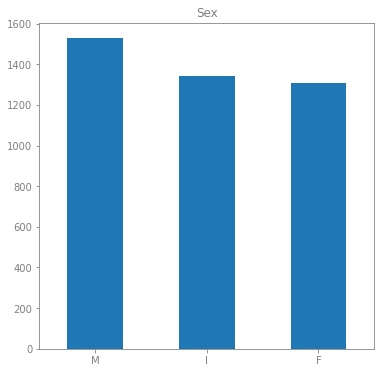

In [5]:
params = {
    'ytick.color' : 'grey',
    'xtick.color' : 'grey',
    'axes.labelcolor' : 'grey',
    'axes.edgecolor' : 'grey',
    'figure.figsize' : [6, 6],
    'text.color': 'grey'
}

plt.rcParams.update(params)

plot_qualitative = data['Sex'].value_counts().plot.bar(
    rot=0, title='Sex')


4. Histogramy cech ilościowych

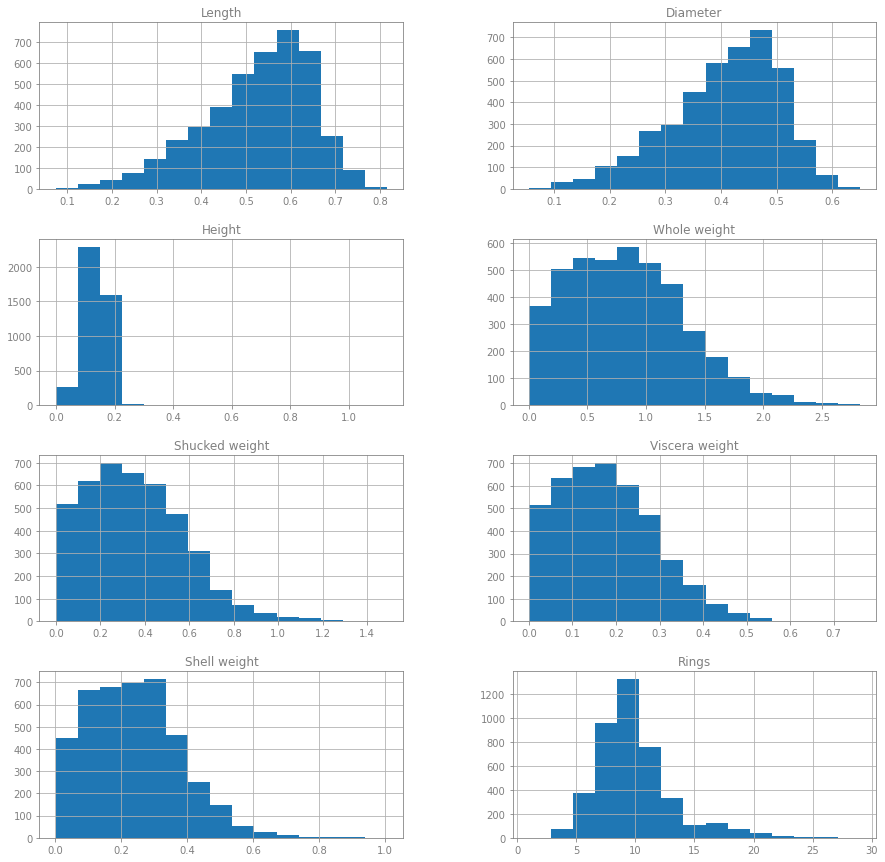

In [6]:
plt.rcParams['figure.figsize'] = 15, 15

histogram_quantitative = data.hist(layout=[4, 2], bins=15)

*Wymagania na ocenę dobrą*

**1. Wymagania na ocenę dostateczną (*powyżej*)**

**2. Wykresy punktowe dla cech ilościowych.**

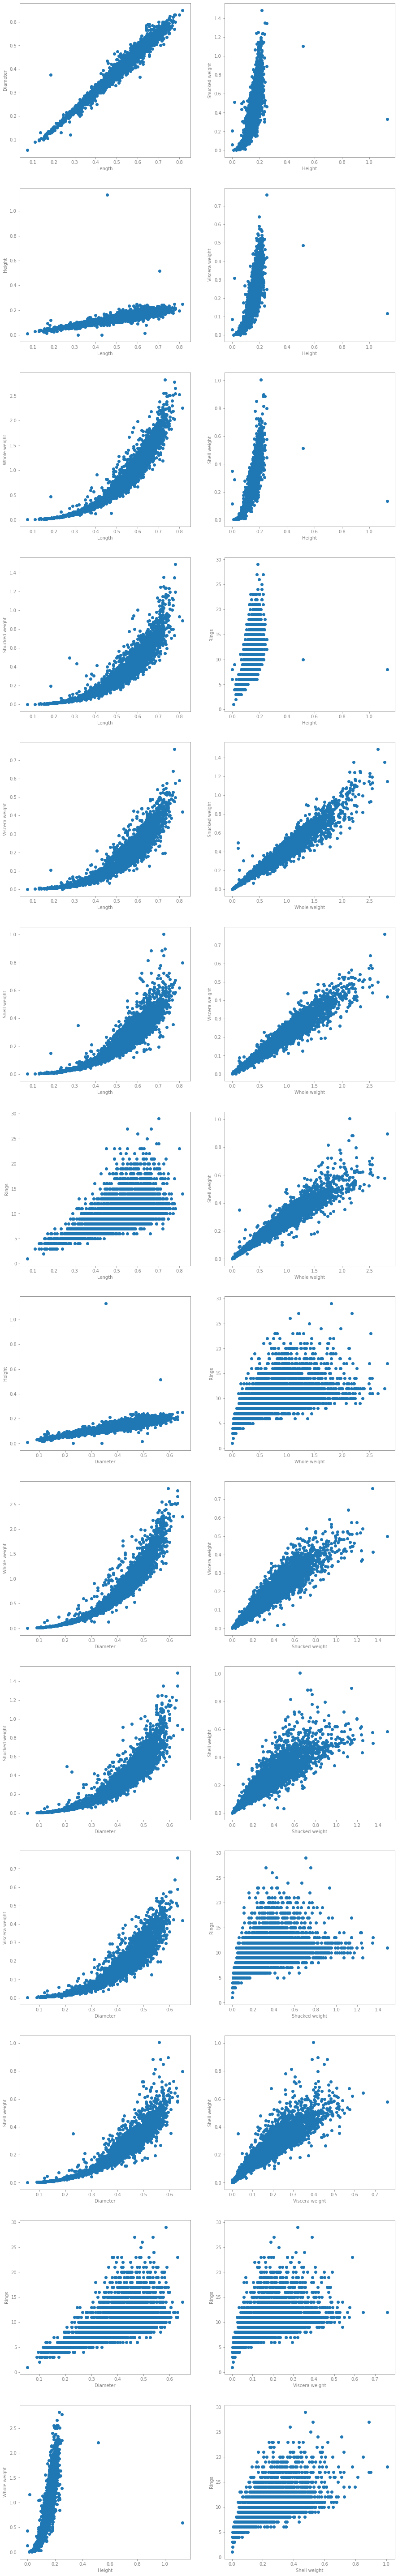

In [7]:
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(15, 105))

data_quantitative = data.select_dtypes(np.number)

counter = 0

for idx, valx in enumerate(data_quantitative):
    for idy, valy in enumerate(data_quantitative):
        if valx != valy and idy > idx:
            axs[counter % 14, counter // 14].scatter(
                data_quantitative[valx], data_quantitative[valy])
            axs[counter % 14, counter // 14].set_xlabel(
                data_quantitative.columns[idx])
            axs[counter % 14, counter // 14].set_ylabel(
                data_quantitative.columns[idy])
            counter += 1


**3. Tabela macierzy korelacji liniowej dla cech ilościowych.**

In [8]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


**4. Mapa cieplna reprezentująca macierz korelacji liniowej.**

<AxesSubplot:>

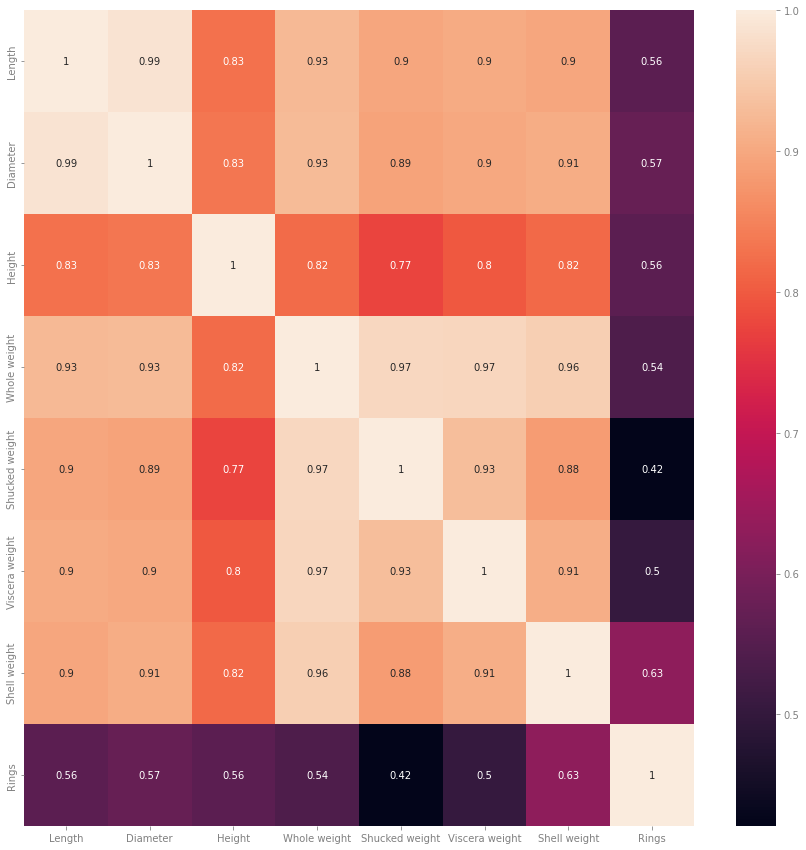

In [9]:
# mask = np.zeros_like(data.corr())
# mask[np.triu_indices_from(mask)] = True
# sea.heatmap(data.corr(), annot=True, mask=mask)
sea.heatmap(data.corr(), annot=True)

**5. Wykres regresji liniowej dla dwóch cech ilościowych najmocniej skorelowanych liniowo.**

<AxesSubplot:xlabel='Diameter', ylabel='Length'>

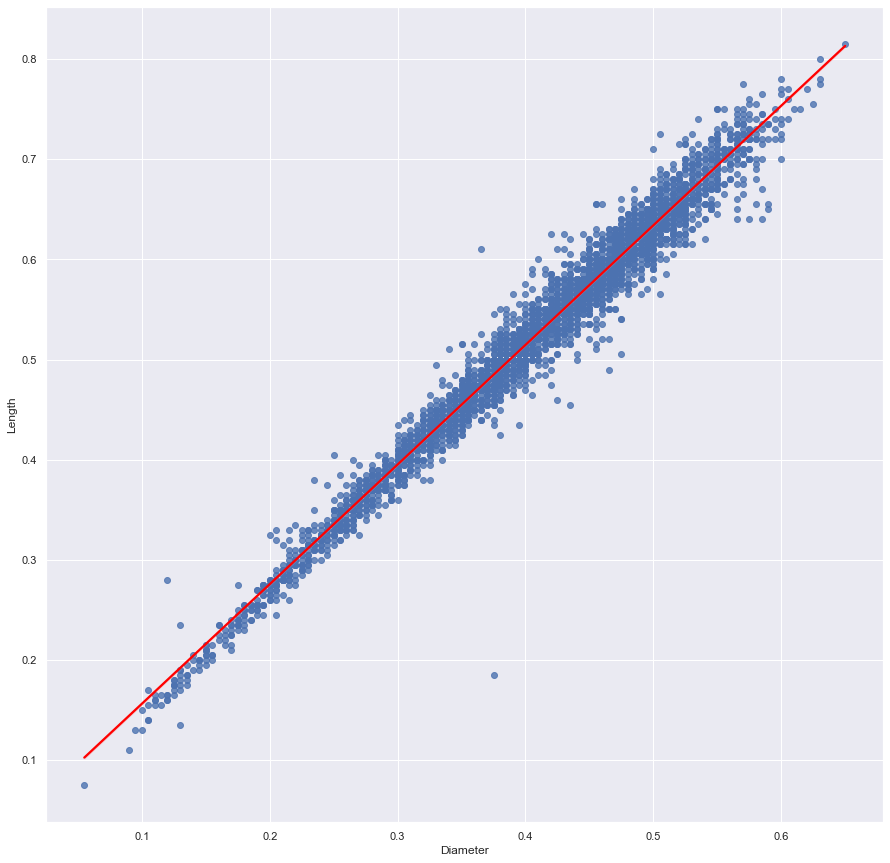

In [10]:
sea.set_theme(color_codes=True)

sea.regplot(
    x='Diameter', y='Length', data=data_quantitative,
    line_kws={'color': 'red'})


*Wymagania na ocenę bardzo dobrą*

**1. Wymagania na ocenę dobrą (*powyżej*)**

**2. Tabela miar rozkładu cech ilościowych z uwzględnieniem cech jakościowych.**

In [11]:
multi_mean_values = data.groupby(by='Sex').mean().unstack()
multi_std_values = data.groupby(by='Sex').std().unstack()
multi_min_values = data.groupby(by='Sex').min().unstack()
multi_first_quartile = data.groupby(by='Sex').quantile(0.25).unstack()
multi_median = data.groupby(by='Sex').quantile(0.5).unstack()
multi_third_quartile = data.groupby(by='Sex').quantile(0.75).unstack()
multi_max_values = data.groupby(by='Sex').max().unstack()



output_multi = pd.concat([multi_mean_values, multi_std_values,
    multi_min_values, multi_first_quartile, multi_median,
    multi_third_quartile, multi_max_values], axis=1)

output_multi.columns = ['mean', 'std', 'min', '25%',
                        '50%', '75%', 'max']
output_multi.rename(index={'F': 'Female', 'I': 'Infant',
                           'M': 'Male'}, inplace=True)
output_multi.index.names = ['Feature', 'Sex']

display(output_multi)

mean       std     min       25%       50%  \
Feature        Sex                                                       
Length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561391  0.102697  0.1550  0.505000   0.58000   
Diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439287  0.084398  0.1100  0.395000   0.45500   
Height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151381  0.034804  0.0250  0.130000   0.15500   
Whole weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991459  0.470581  0.0155  0.671625   0.97575   
Shucked weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.432946  0.223000  0.0065  0.276375   0.42175   
Viscera weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215545  0.104919  0.0030  0.145875   0.21000   
Shell weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.281969  0.130834  0.0050  0.190000   0.27600   
Rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.705497  3.026349  3.0000  9.000000  10.00000   

                             75%      max  
Feature        Sex                         
Length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
Diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
Height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
Whole weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265625   2.8255  
Shucked weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
Viscera weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
Shell weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
Rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000

**3. Wykres pudełkowy dla każdej cechy ilościowej z rozróżnieniem wariantów cechy jakościowej.**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


array([<AxesSubplot:title={'center':'Diameter'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Height'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Length'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Rings'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Shell weight'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Shucked weight'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Viscera weight'}, xlabel='[Sex]'>,
       <AxesSubplot:title={'center':'Whole weight'}, xlabel='[Sex]'>],
      dtype=object)

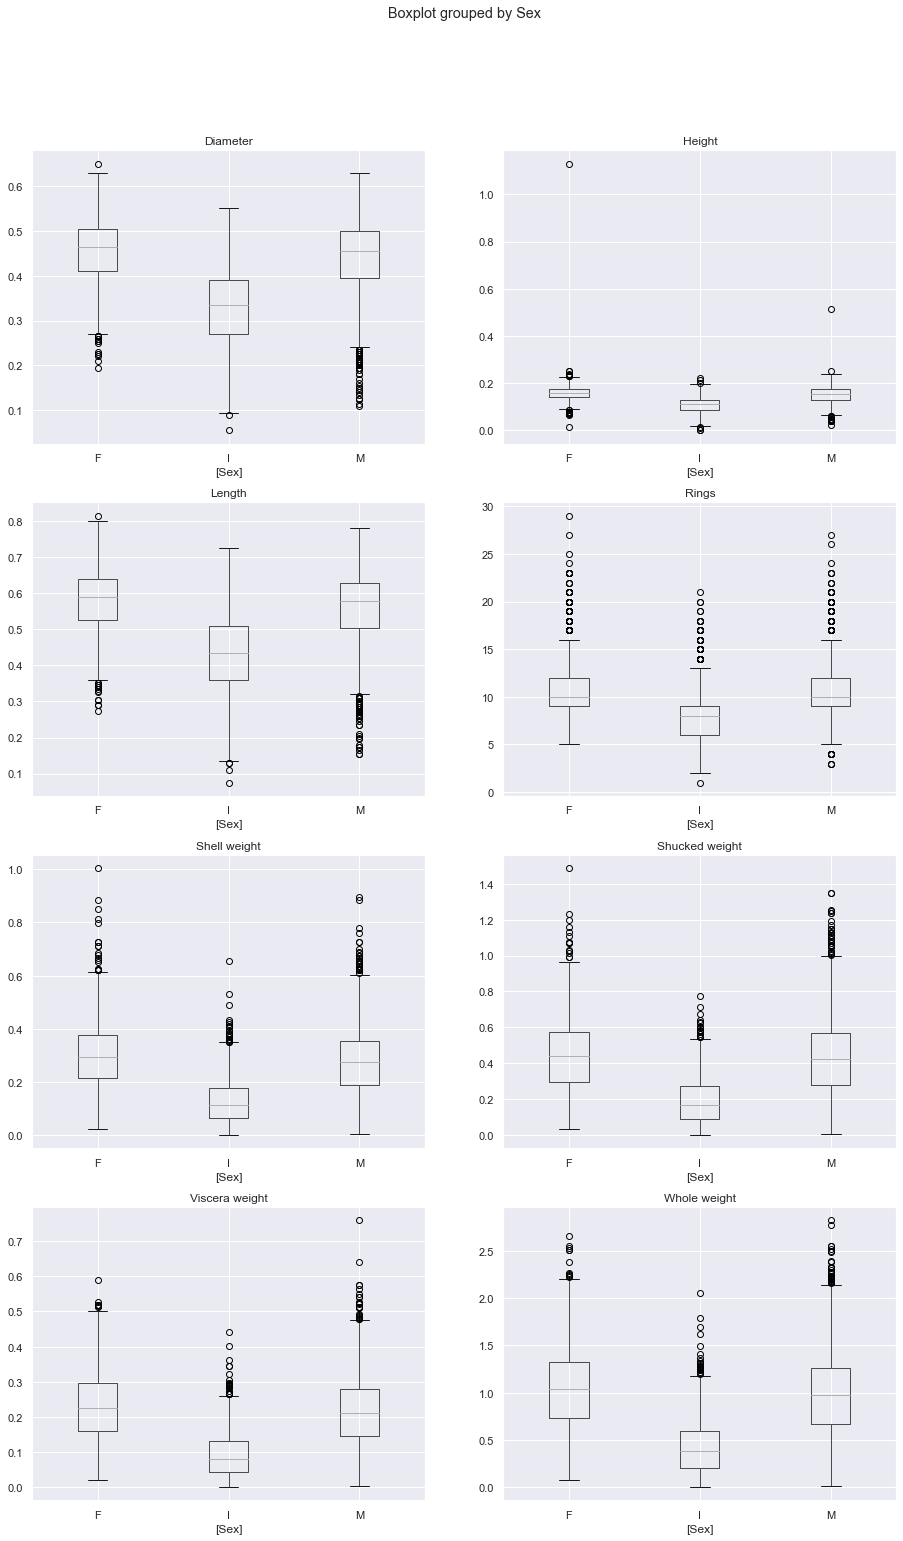

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
data.boxplot(by='Sex', ax=axs)


